# Asteroid Diameter Prediction with various ML algorithms
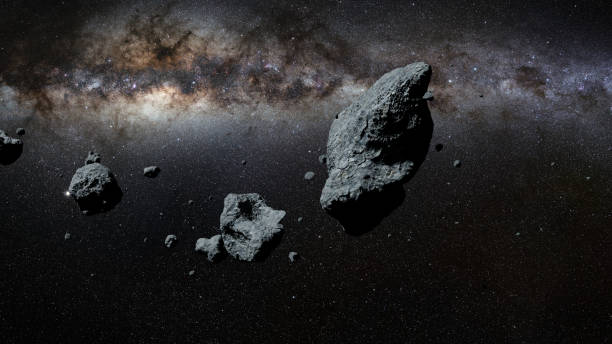

image source(https://www.istockphoto.com/photos/asteroid)

In this project, I will try to predict the diameter of asteroid with various ML algorithms such as Linear Regressor, Decision Tree Regressor,  Random Forest Regressor and XGboost Regressor. The data is downloaded from (https://www.kaggle.com/datasets/basu369victor/prediction-of-asteroid-diameter).

The following steps are taken in this work:
- Downloading a real-world dataset from a Kaggle
- Understanding the dataset, formulating the problem and describing objective.
- Performing a exploratory data analysis, gathering insights, creating a training, validation & test split and finally preparing the data for modeling.
- Training & evaluating the different machine learning models, tuning hyperparameters to improve models.
- Report of final performance of best model and showing sample predictions. 
- At last, summary of the work and links to references.

# Installing Required Libraries

In [ ]:
!pip install pandas-profiling numpy matplotlib seaborn --quiet

In [ ]:
!pip install opendatasets scikit-learn jovian --quiet --upgrade

In [ ]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import jovian
import os

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Downloading Dataset and Reading

In [ ]:
od.download('https://www.kaggle.com/datasets/basu369victor/prediction-of-asteroid-diameter?select=Asteroid_Updated.csv')

Skipping, found downloaded files in "./prediction-of-asteroid-diameter" (use force=True to force download)


In [ ]:
os.listdir('prediction-of-asteroid-diameter')

['Asteroid_Updated.csv', 'Asteroid.csv']

In [ ]:
raw_df = pd.read_csv('prediction-of-asteroid-diameter/Asteroid_Updated.csv')
raw_df

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,extent,albedo,rot_per,GM,BV,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.340,N,N,939.4,964.4 x 964.2 x 891.8,0.0900,9.074170,62.6284,0.713,0.426,NaN,C,G,0.12,1.594780,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.130,N,N,545,582x556x500,0.1010,7.813200,14.3000,0.635,0.284,NaN,B,B,0.11,1.233240,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.330,N,N,246.596,NaN,0.2140,7.210000,NaN,0.824,0.433,NaN,Sk,S,0.32,1.034540,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.200,N,N,525.4,572.6 x 557.2 x 446.4,0.4228,5.342128,17.8000,0.782,0.492,NaN,V,V,0.32,1.139480,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,2916,6.850,N,N,106.699,NaN,0.2740,16.806000,NaN,0.826,0.411,NaN,S,S,NaN,1.095890,MBA,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839709,NaN,2.812945,0.664688,4.695700,183.310012,234.618352,0.943214,4.682676,4.717914,17298.0,0,118,20.400,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032397,APO,0.208911,1723.217927,156.905910
839710,NaN,2.645238,0.259376,12.574937,1.620020,339.568072,1.959126,3.331350,4.302346,16.0,9,15,17.507,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.956145,MBA,0.229090,1571.431965,13.366251
839711,NaN,2.373137,0.202053,0.732484,176.499082,198.026527,1.893638,2.852636,3.655884,5.0,9,6,18.071,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.893896,MBA,0.269600,1335.311579,355.351127
839712,NaN,2.260404,0.258348,9.661947,204.512448,148.496988,1.676433,2.844376,3.398501,10.0,9,13,18.060,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.680220,MBA,0.290018,1241.302609,15.320134


Let's understand the data first.

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839714 entries, 0 to 839713
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            21967 non-null   object 
 1   a               839712 non-null  float64
 2   e               839714 non-null  float64
 3   i               839714 non-null  float64
 4   om              839714 non-null  float64
 5   w               839714 non-null  float64
 6   q               839714 non-null  float64
 7   ad              839708 non-null  float64
 8   per_y           839713 non-null  float64
 9   data_arc        824240 non-null  float64
 10  condition_code  838847 non-null  object 
 11  n_obs_used      839714 non-null  int64  
 12  H               837025 non-null  float64
 13  neo             839708 non-null  object 
 14  pha             823272 non-null  object 
 15  diameter        137636 non-null  object 
 16  extent          18 non-null      object 
 17  albedo    

There are several misising values in the columns GM, IR, G, extent etc.,. We can drop these columns. Also dorpping name, condition_code, neo and pha as these do not affect the diameter. Before we do that let's handle the diameter column first, several missing values are there as well.

# Exploratory Data Analysis, Data Cleaning and Preprocessing
Let's begin the analysis

Adding the argument "errors='coerce'" to set corrupted diameters to nan, and later dropped them.

In [ ]:
raw_df['diameter']=pd.to_numeric(raw_df['diameter'],errors='coerce')

In [ ]:
raw_df.dropna(subset=['diameter'], inplace=True)

Dropped all the null values in diameter column. Now also dropping other columns with missing value.

In [ ]:
new_df = raw_df.drop(['GM','BV','IR','extent','G','UB','spec_B','spec_T','rot_per','neo','condition_code','pha','name'], axis=1)

Let's check the info again.

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137635 entries, 0 to 810375
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   a           137635 non-null  float64
 1   e           137635 non-null  float64
 2   i           137635 non-null  float64
 3   om          137635 non-null  float64
 4   w           137635 non-null  float64
 5   q           137635 non-null  float64
 6   ad          137635 non-null  float64
 7   per_y       137635 non-null  float64
 8   data_arc    137497 non-null  float64
 9   n_obs_used  137635 non-null  int64  
 10  H           136888 non-null  float64
 11  diameter    137635 non-null  float64
 12  albedo      136405 non-null  float64
 13  moid        137635 non-null  float64
 14  class       137635 non-null  object 
 15  n           137635 non-null  float64
 16  per         137635 non-null  float64
 17  ma          137635 non-null  float64
dtypes: float64(16), int64(1), object(1)
memory u

There still few value are nan in some coulumns. We can take the mean of the coulumns to fill them, but first let us see the min and max values of all the columns.

In [ ]:
new_df.describe()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,diameter,albedo,moid,n,per,ma
count,137635.000000,137635.000000,137635.000000,137635.000000,137635.000000,137635.000000,137635.000000,137635.000000,137497.000000,137635.000000,136888.000000,137635.000000,136405.000000,137635.000000,137635.000000,1.376350e+05,137635.000000
mean,2.814612,0.145485,10.349235,169.827772,181.904210,2.402608,3.226617,4.884247,8969.790337,675.015468,15.177109,5.481626,0.130066,1.420145,0.219640,1.783971e+03,183.116021
std,1.522745,0.077574,6.835108,102.713411,103.556763,0.516171,2.896385,25.532657,6165.189701,595.919879,1.407436,9.366928,0.109994,0.512243,0.056980,9.325803e+03,103.411484
min,0.626226,0.000489,0.021855,0.000738,0.004466,0.081882,0.999956,0.495569,1.000000,5.000000,3.200000,0.002500,0.001000,0.000166,0.000128,1.810067e+02,0.000517
25%,2.536710,0.089622,5.120694,82.334464,91.947794,2.068948,2.864437,4.040308,6291.000000,215.000000,14.400000,2.770000,0.053000,1.082515,0.181231,1.475723e+03,94.300733
50%,2.750853,0.138543,9.390074,160.438501,183.668021,2.363884,3.167516,4.562568,7572.000000,496.000000,15.300000,3.956000,0.078000,1.384930,0.216024,1.666478e+03,186.826029
75%,3.092538,0.191141,13.738623,256.268890,271.763347,2.685812,3.468609,5.438519,9731.000000,984.000000,16.100000,5.741500,0.188000,1.699390,0.243948,1.986419e+03,271.467660
max,389.145964,0.984348,170.323647,359.990858,359.995174,40.465671,772.201080,7676.742943,72684.000000,9325.000000,29.900000,939.400000,1.000000,39.507000,1.988877,2.803930e+06,359.999979


In [ ]:
new_df = new_df.fillna(new_df.mean())

<ipython-input-369-5640e8055373>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_df = new_df.fillna(new_df.mean())


Checking info again.

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137635 entries, 0 to 810375
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   a           137635 non-null  float64
 1   e           137635 non-null  float64
 2   i           137635 non-null  float64
 3   om          137635 non-null  float64
 4   w           137635 non-null  float64
 5   q           137635 non-null  float64
 6   ad          137635 non-null  float64
 7   per_y       137635 non-null  float64
 8   data_arc    137635 non-null  float64
 9   n_obs_used  137635 non-null  int64  
 10  H           137635 non-null  float64
 11  diameter    137635 non-null  float64
 12  albedo      137635 non-null  float64
 13  moid        137635 non-null  float64
 14  class       137635 non-null  object 
 15  n           137635 non-null  float64
 16  per         137635 non-null  float64
 17  ma          137635 non-null  float64
dtypes: float64(16), int64(1), object(1)
memory u

Now everything looks fine. Let's get down to the business. Lets's check the correlation first.

In [ ]:
corr = new_df.corr()
corr["diameter"].sort_values(ascending=False)

diameter      1.000000
data_arc      0.492461
n_obs_used    0.386050
moid          0.333053
q             0.330323
a             0.145015
ad            0.093613
i             0.052897
per           0.049050
per_y         0.049050
ma            0.009504
w             0.002894
om            0.001199
e            -0.049206
albedo       -0.107535
n            -0.201360
H            -0.568596
Name: diameter, dtype: float64

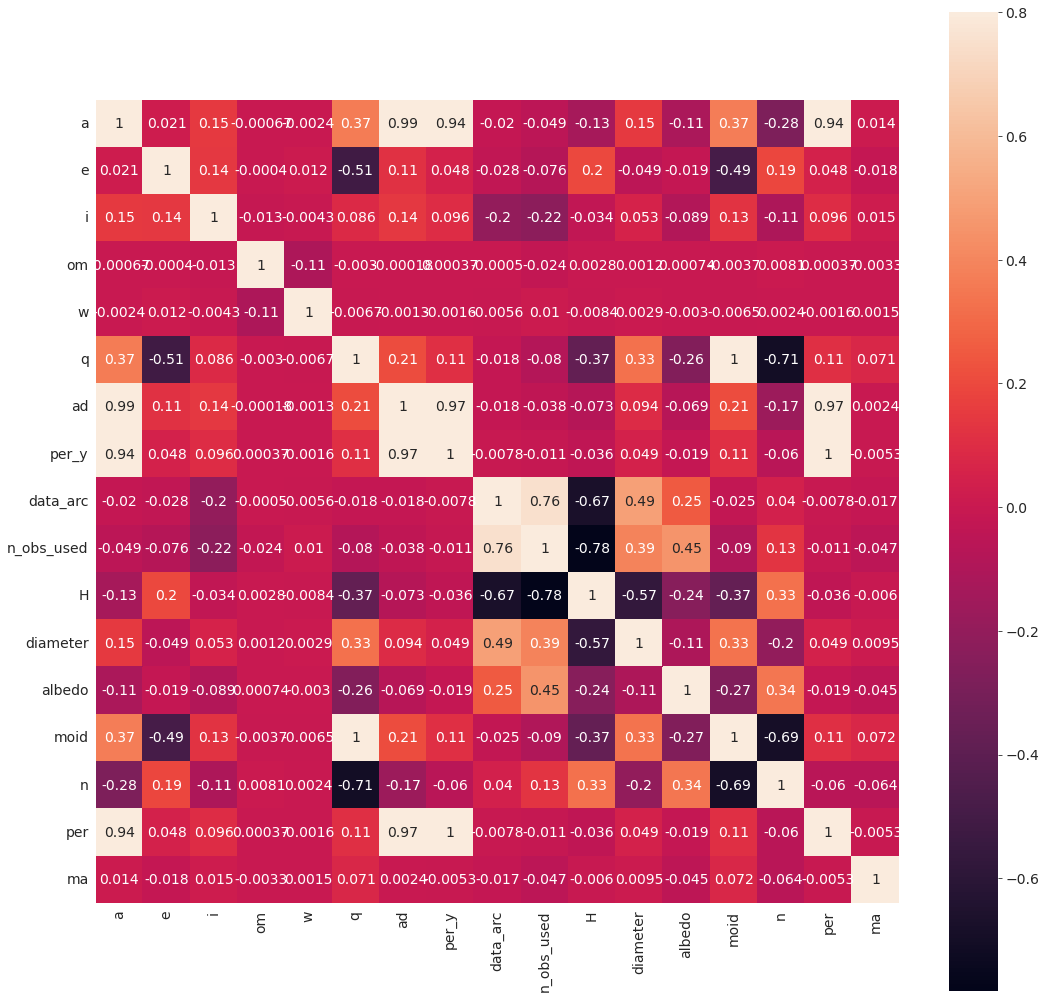

In [ ]:
corr_m = new_df.corr()
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(corr_m, vmax=.8, square=True,  annot=True)

H columns seem to have maximum correlation with diameter while W and om columns has very less correlation with diameter, so we can drop these two columns too.

In [ ]:
new_df.drop(['w','om'], axis=1,inplace=True)

In [ ]:
updated_df= new_df.iloc[:,[0,1,2,3,4,5,6,7,8,10,11,12,13,14,9]]

Changed the position of diameter columns for simplicity.

In [ ]:
updated_df

,a,e,i,q,ad,per_y,data_arc,n_obs_used,H,albedo,moid,class,n,per,diameter
0,2.769165,0.076009,10.594067,2.558684,2.979647,4.608202,8822.0,1002,3.34,0.090000,1.59478,MBA,0.213885,1683.145708,939.400
1,2.772466,0.230337,34.836234,2.133865,3.411067,4.616444,72318.0,8490,4.13,0.101000,1.23324,MBA,0.213503,1686.155999,545.000
2,2.669150,0.256942,12.988919,1.983332,3.354967,4.360814,72684.0,7104,5.33,0.214000,1.03454,MBA,0.226019,1592.787285,246.596
3,2.361418,0.088721,7.141771,2.151909,2.570926,3.628837,24288.0,9325,3.20,0.422800,1.13948,MBA,0.271609,1325.432765,525.400
4,2.574249,0.191095,5.366988,2.082324,3.066174,4.130323,63507.0,2916,6.85,0.274000,1.09589,MBA,0.238632,1508.600458,106.699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797860,3.171225,0.159119,27.098625,2.666623,3.675826,5.647402,2373.0,50,16.20,0.021000,1.66301,MBA,0.174527,2062.713583,3.793
798077,2.548410,0.076071,11.593237,2.354549,2.742270,4.068291,3297.0,33,17.30,0.061000,1.36733,MBA,0.242270,1485.943371,2.696
798189,3.146246,0.220559,17.966646,2.452313,3.840180,5.580811,2839.0,47,16.80,0.130066,1.43837,MBA,0.176610,2038.391053,2.917
799752,3.051336,0.287449,14.456779,2.174231,3.928440,5.330196,2208.0,27,17.20,0.072000,1.16684,MBA,0.184914,1946.853973,3.271


In [ ]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137635 entries, 0 to 810375
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   a           137635 non-null  float64
 1   e           137635 non-null  float64
 2   i           137635 non-null  float64
 3   q           137635 non-null  float64
 4   ad          137635 non-null  float64
 5   per_y       137635 non-null  float64
 6   data_arc    137635 non-null  float64
 7   n_obs_used  137635 non-null  int64  
 8   H           137635 non-null  float64
 9   albedo      137635 non-null  float64
 10  moid        137635 non-null  float64
 11  class       137635 non-null  object 
 12  n           137635 non-null  float64
 13  per         137635 non-null  float64
 14  diameter    137635 non-null  float64
dtypes: float64(13), int64(1), object(1)
memory usage: 16.8+ MB


Finally, the data has been cleaned.

# Splitting data, Scaling Numeric Features and Encoding on catagorical column

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

Let's identify the input and target columns.

In [ ]:
# Identify input and target columns
input_cols, target_col = updated_df.columns[0:-1], updated_df.columns[-1]
inputs_df, targets = updated_df[input_cols].copy(), updated_df[target_col].copy()

# Identify numeric and categorical columns
numeric_cols = updated_df[input_cols].select_dtypes(include=np.number).columns.tolist()
categorical_cols = updated_df[input_cols].select_dtypes(include='object').columns.tolist()

# scale numeric columns
scaler = MinMaxScaler().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

# Create training and validation sets
train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs_df[numeric_cols + encoded_cols], targets, test_size=0.25, random_state=42)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Models for Prediction

Aim is to maximize score and minimize the RMSE value.

# **Model = LinearRegression**



In [ ]:
!pip install scikit-learn --quiet

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(train_inputs, train_targets)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
model_train_preds = model.predict(train_inputs)
LR_train_rmse = mean_squared_error(model_train_preds, train_targets, squared=False)
model_val_preds = model.predict(val_inputs)
LR_val_rmse = mean_squared_error(model_val_preds, val_targets, squared=False)
print('Train RMSE: {}, Validation RMSE: {}'.format(LR_train_rmse, LR_val_rmse))

Train RMSE: 6.390732204659411, Validation RMSE: 7.422622235756638


In [ ]:
train_score =model.score(train_inputs, train_targets)
train_score

0.5261670252443923

In [ ]:
val_score = model.score(val_inputs, val_targets)
val_score

0.40355725208392146

The basic logistic regression model is able to give score of 40% on validation set and RMSE Error of 7.422. Let's feed this data to another model.

# **Model = Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(train_inputs, train_targets)

DecisionTreeRegressor(random_state=42)

In [ ]:
tree_train_preds = tree.predict(train_inputs)
DTR_train_rmse = mean_squared_error(tree_train_preds, train_targets, squared=False)
tree_val_preds = tree.predict(val_inputs)
DTR_val_rmse = mean_squared_error(tree_val_preds, val_targets, squared=False)
print('Train RMSE: {}, Validation RMSE: {}'.format(DTR_train_rmse, DTR_val_rmse))

Train RMSE: 1.692861005491513e-18, Validation RMSE: 2.5627081712576705


In [ ]:
train_score1= tree.score(train_inputs, train_targets)
train_score1

1.0

In [ ]:
val_score1 = tree.score(val_inputs, val_targets)
val_score1

0.9289028236114334

The Decision Tree Regressor model is able to score 92.8% on validation set and give RMSE Error of 2.562. It's a significant improvement from the last model.

Cheking the importance factor for this model.

In [ ]:
model_importances = tree.feature_importances_

In [ ]:
model_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model_importances
}).sort_values('importance', ascending=False)

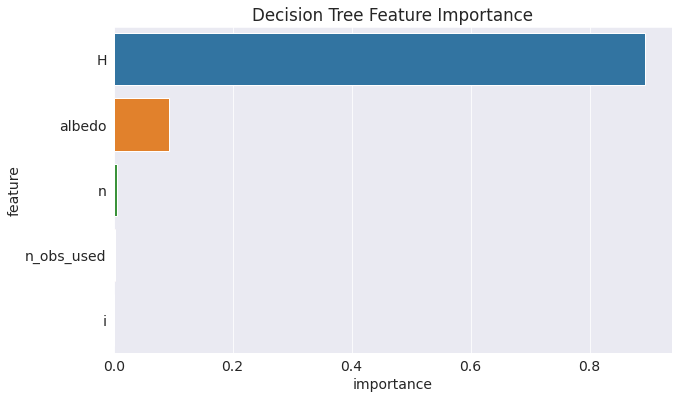

In [ ]:
plt.title('Decision Tree Feature Importance')
sns.barplot(data=model_importance_df.head(5), x='importance', y='feature');

H columns seem to have high impact. It can also be understood from correlation of H with diameter. Let's feed data to another model.

# **Model = Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
random = RandomForestRegressor(n_jobs=-1, random_state=42)
random.fit(train_inputs, train_targets)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
random_train_preds = random.predict(train_inputs)
RFR_train_rmse = mean_squared_error(random_train_preds, train_targets, squared=False)
random_val_preds = random.predict(val_inputs)
RFR_val_rmse = mean_squared_error(random_val_preds, val_targets, squared=False)
print('Train RMSE: {}, Validation RMSE: {}'.format(RFR_train_rmse, RFR_val_rmse))

Train RMSE: 0.7103741297028803, Validation RMSE: 2.4741447185378136


In [ ]:
train_score2 =random.score(train_inputs, train_targets)
train_score2

0.9941453853403021

In [ ]:
val_score2 =random.score(val_inputs, val_targets)
val_score2

0.9337319419951442

The Random Forest Regressor model is able to score 93.3% on validation set and give RMSE Error of 2.47. It's a good improvement from the last model. Let's also check the importance factor for this model.

In [ ]:
model_importances = random.feature_importances_

In [ ]:
model_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model_importances
}).sort_values('importance', ascending=False)

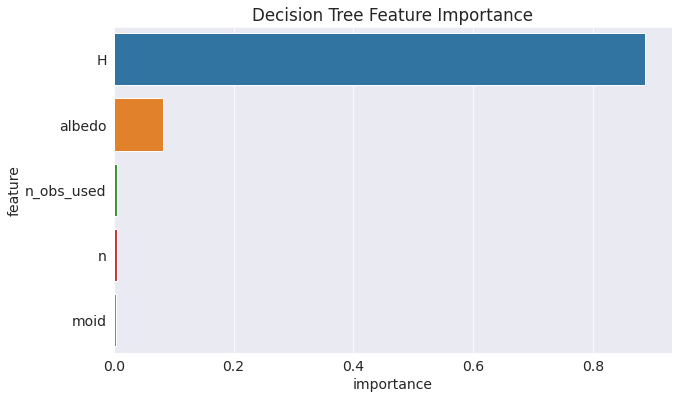

In [ ]:
plt.title('Decision Tree Feature Importance')
sns.barplot(data=model_importance_df.head(5), x='importance', y='feature');

Again H columns seem to have high impact.

# **Model= XGboost Regressor**

In [ ]:
from xgboost import XGBRegressor

In [ ]:
X = XGBRegressor(random_state=42)
X.fit(train_inputs, train_targets)

[16:36:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=42)

In [ ]:
X_train_preds = X.predict(train_inputs)
XGB_train_rmse = mean_squared_error(X_train_preds, train_targets, squared=False)
X_val_preds = X.predict(val_inputs)
XGB_val_rmse = mean_squared_error(X_val_preds, val_targets, squared=False)
print('Train RMSE: {}, Validation RMSE: {}'.format(XGB_train_rmse, XGB_val_rmse))

Train RMSE: 0.9308645238705157, Validation RMSE: 2.2968978150573935


In [ ]:
train_score3 = X.score(train_inputs, train_targets)
train_score3

0.9899469694952324

In [ ]:
val_score3 = X.score(val_inputs, val_targets)
val_score3

0.9428866814952325

The XGboost Regressor is able to score 94.2% on validation set and give RMSE Error of 2.29. Certainly made more improvement from the last model. Let's also check the importance factor for this model.

In [ ]:
model_importances = X.feature_importances_
model_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model_importances
}).sort_values('importance', ascending=False)

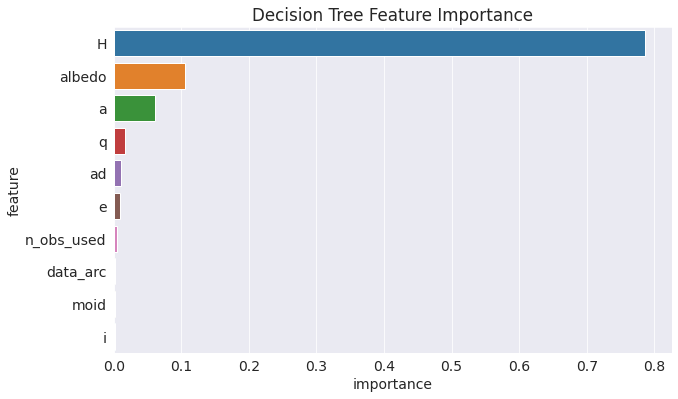

In [ ]:
plt.title('Decision Tree Feature Importance')
sns.barplot(data=model_importance_df.head(10), x='importance', y='feature');

# Lets compare all the models

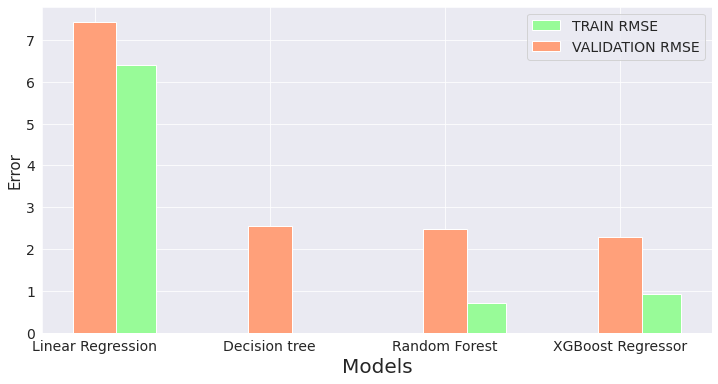

In [ ]:
models=['Linear Regression', 'Decision tree', 'Random Forest', 'XGBoost Regressor' ]
R=[LR_train_rmse, DTR_train_rmse, RFR_train_rmse , XGB_train_rmse]
V=[LR_val_rmse, DTR_val_rmse, RFR_val_rmse, XGB_val_rmse]

plt.figure(figsize=(12, 6))

plt.bar(models, R, width=0.35, align='edge', color='palegreen', label = "TRAIN RMSE")
plt.bar(models, V, width=0.25, color='lightsalmon', label = "VALIDATION RMSE")

plt.xlabel("Models", fontsize = 20)
plt.ylabel("Error", fontsize= 15, rotation= 90)
plt.legend()

There is almost zero train_RMSE value for decision tree regressor. That's why there is no green bar above.

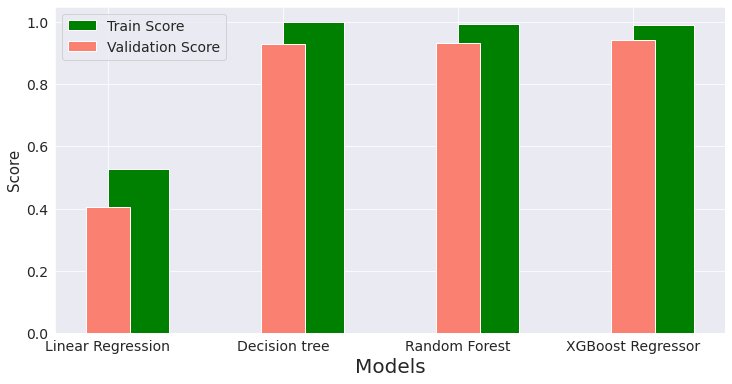

In [ ]:
models=['Linear Regression', 'Decision tree', 'Random Forest', 'XGBoost Regressor' ]
R=[train_score, train_score1, train_score2 , train_score3]
V=[val_score, val_score1, val_score2, val_score3]

plt.figure(figsize=(12, 6))

plt.bar(models, R, width=0.35, align='edge', color='green', label = "Train Score")
plt.bar(models, V, width=0.25, color='salmon', label = "Validation Score")

plt.xlabel("Models", fontsize = 20)
plt.ylabel("Score", fontsize= 15, rotation= 90)
plt.legend()

As we see from the above two plots, Random forest and XGBoost Regressor are working best on validation dataset. From now on, I will only use these two models and will try to make these two even better.

# Making ML models better

Earlier I did not look for the outliers. This time I will try to remove them as well.

In [ ]:
updated_df.describe()

,a,e,i,q,ad,per_y,data_arc,n_obs_used,H,albedo,moid,n,per,diameter
count,137635.000000,137635.000000,137635.000000,137635.000000,137635.000000,137635.000000,137635.000000,137635.000000,137635.000000,137635.000000,137635.000000,137635.000000,1.376350e+05,137635.000000
mean,2.814612,0.145485,10.349235,2.402608,3.226617,4.884247,8969.790337,675.015468,15.177109,0.130066,1.420145,0.219640,1.783971e+03,5.481626
std,1.522745,0.077574,6.835108,0.516171,2.896385,25.532657,6162.098134,595.919879,1.403611,0.109502,0.512243,0.056980,9.325803e+03,9.366928
min,0.626226,0.000489,0.021855,0.081882,0.999956,0.495569,1.000000,5.000000,3.200000,0.001000,0.000166,0.000128,1.810067e+02,0.002500
25%,2.536710,0.089622,5.120694,2.068948,2.864437,4.040308,6292.000000,215.000000,14.400000,0.053000,1.082515,0.181231,1.475723e+03,2.770000
50%,2.750853,0.138543,9.390074,2.363884,3.167516,4.562568,7577.000000,496.000000,15.300000,0.079000,1.384930,0.216024,1.666478e+03,3.956000
75%,3.092538,0.191141,13.738623,2.685812,3.468609,5.438519,9726.000000,984.000000,16.100000,0.187000,1.699390,0.243948,1.986419e+03,5.741500
max,389.145964,0.984348,170.323647,40.465671,772.201080,7676.742943,72684.000000,9325.000000,29.900000,1.000000,39.507000,1.988877,2.803930e+06,939.400000


In [ ]:
updated_df=updated_df[updated_df.a < 18].copy()
updated_df=updated_df[updated_df.q < 7].copy() 
updated_df=updated_df[updated_df.ad < 10].copy() 
updated_df=updated_df[updated_df.data_arc < 25000].copy() 
updated_df=updated_df[updated_df.n_obs_used < 5000].copy() 
updated_df=updated_df[updated_df.per_y < 17].copy() 
updated_df=updated_df[updated_df.moid < 10].copy() 
updated_df=updated_df[updated_df.diameter < 300].copy()

In [ ]:
df= updated_df

In [ ]:
df.describe()

,a,e,i,q,ad,per_y,data_arc,n_obs_used,H,albedo,moid,n,per,diameter
count,133912.000000,133912.000000,133912.000000,133912.000000,133912.000000,133912.000000,133912.000000,133912.000000,133912.000000,133912.000000,133912.000000,133912.000000,133912.000000,133912.000000
mean,2.802722,0.145238,10.376994,2.401607,3.203836,4.736172,8291.380848,631.171852,15.276821,0.128769,1.419235,0.219514,1729.886907,4.752929
std,0.451004,0.077038,6.722273,0.478028,0.518666,1.212505,4461.500718,532.222352,1.249681,0.108462,0.473442,0.056973,442.867370,3.751772
min,0.626226,0.000489,0.021855,0.081882,0.999956,0.495569,1.000000,5.000000,7.930000,0.001000,0.000166,0.058083,181.006674,0.002500
25%,2.539541,0.089440,5.154793,2.071510,2.866367,4.047072,6267.000000,209.000000,14.500000,0.053000,1.085150,0.181194,1478.193038,2.742000
50%,2.752278,0.138381,9.439825,2.366229,3.169288,4.566113,7528.000000,478.000000,15.300000,0.078000,1.387065,0.215857,1667.772700,3.891000
75%,3.092957,0.191008,13.770158,2.686390,3.469285,5.439627,9502.000000,933.000000,16.100000,0.184000,1.700160,0.243541,1986.823645,5.570000
max,6.603446,0.968381,74.668105,5.275309,9.601146,16.969308,24994.000000,4618.000000,29.900000,1.000000,4.279410,1.988877,6198.039824,140.362000


This time let's also define the test data.

In [ ]:
train_val_df, test_df = train_test_split(df, test_size = 0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size = 0.25, random_state=42)

In [ ]:
print('train_df size: ', train_df.shape)
print('val_df size: ', val_df.shape)
print('test_df size: ', test_df.shape)

train_df size:  (80346, 15)
val_df size:  (26783, 15)
test_df size:  (26783, 15)


#lets define input and target columns

In [ ]:

input_cols, target_col = train_df.columns[0:-1], train_df.columns[-1]

# Identify numeric and categorical columns
numeric_cols = train_df[input_cols].select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_df[input_cols].select_dtypes(include='object').columns.tolist()

In [ ]:
train_inputs = train_df[input_cols].copy()
val_inputs = val_df[input_cols].copy()
test_inputs = test_df[input_cols].copy()

In [ ]:
train_targets = train_df[target_col].copy()
val_targets1 = val_df[target_col].copy()
test_targets1 = test_df[target_col].copy()

Scaling above between 0 to 1.

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols].describe()

,a,e,i,q,ad,per_y,data_arc,n_obs_used,H,albedo,moid,n,per
count,80346.000000,80346.000000,80346.000000,80346.000000,80346.000000,80346.000000,80346.000000,80346.000000,80346.000000,80346.000000,80346.000000,80346.000000,80346.000000
mean,0.005603,0.147415,0.060731,0.057429,0.002859,0.000553,0.113883,0.067144,0.452364,0.127907,0.035904,0.110308,0.000553
std,0.001163,0.078308,0.039399,0.011855,0.000674,0.000158,0.061100,0.057046,0.046849,0.108740,0.012000,0.028687,0.000158
min,0.000000,0.000000,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000,0.177154,0.000000,0.000000,0.034560,0.000000
25%,0.004925,0.090895,0.030154,0.049277,0.002421,0.000463,0.086196,0.021888,0.423221,0.052052,0.027456,0.091045,0.000463
50%,0.005471,0.140662,0.055316,0.056544,0.002814,0.000530,0.103532,0.050644,0.453184,0.077077,0.035073,0.108502,0.000530
75%,0.006349,0.193871,0.080580,0.064451,0.003204,0.000644,0.130581,0.099464,0.483146,0.182182,0.042982,0.122387,0.000644
max,0.013561,0.983771,0.438317,0.128602,0.010866,0.001800,0.343849,0.480258,1.000000,1.000000,0.108317,1.000000,0.001800


# Encoding the catagorical columns

In [ ]:
encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore').fit(train_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [ ]:
train_inputs[encoded_cols]

,class_AMO,class_APO,class_AST,class_ATE,class_CEN,class_IMB,class_MBA,class_MCA,class_OMB,class_TJN
93238,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
167969,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
484954,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
384468,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
176939,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
190126,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
326109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
31519,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
328672,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [ ]:
X_train

,a,e,i,q,ad,per_y,data_arc,n_obs_used,H,albedo,moid,n,per,class_AMO,class_APO,class_AST,class_ATE,class_CEN,class_IMB,class_MBA,class_MCA,class_OMB,class_TJN
93238,0.005463,0.222587,0.087228,0.051101,0.003050,0.000529,0.103821,0.099034,0.426966,0.040040,0.030910,0.108677,0.000529,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
167969,0.006375,0.025298,0.063561,0.072862,0.002829,0.000648,0.099446,0.051931,0.438202,0.110110,0.051536,0.090600,0.000648,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
484954,0.006392,0.269487,0.087187,0.054524,0.003807,0.000650,0.074268,0.009979,0.483146,0.051051,0.033518,0.090304,0.000650,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
384468,0.005135,0.061415,0.031419,0.058923,0.002309,0.000488,0.085894,0.013305,0.513109,0.053053,0.037075,0.116725,0.000488,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
176939,0.005263,0.140591,0.076576,0.054931,0.002648,0.000504,0.085426,0.043884,0.471910,0.058058,0.033386,0.113467,0.000504,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190126,0.006265,0.101236,0.067620,0.066165,0.003069,0.000633,0.105774,0.058691,0.438202,0.135135,0.044894,0.092513,0.000633,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
326109,0.008643,0.157641,0.018280,0.081279,0.004673,0.000971,0.052296,0.018777,0.449438,0.129195,0.060202,0.062256,0.000971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
31519,0.005219,0.171773,0.091060,0.052553,0.002728,0.000499,0.111402,0.121137,0.419476,0.247247,0.032397,0.114560,0.000499,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
328672,0.005114,0.179230,0.047846,0.051239,0.002691,0.000486,0.059271,0.013519,0.513109,0.051051,0.029301,0.117254,0.000486,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Now data is ready to train the models.

# RandomForestRegressor

In [ ]:
random_rf = RandomForestRegressor( n_jobs=-1, random_state=42)
random_rf.fit(X_train, train_targets)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
train_preds_lr = random_rf.predict(X_train)
train_rmse_lr = mean_squared_error(train_preds_lr, train_targets, squared=False)
val_preds_lr = random_rf.predict(X_val)
val_rmse_lr = mean_squared_error(val_preds_lr, val_targets, squared=False)
print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse_lr, val_rmse_lr))

Train RMSE: 0.22649491430623833, Validation RMSE: 0.6453142653840215


In [ ]:
score_train =random_rf.score(X_train, train_targets)
score_train

0.9962551277242685

In [ ]:
score_val =random_rf.score(X_val, val_targets)
score_val

0.9700630292075341

The Random Forest Regressor model is able to score 97.0% on validation set and give RMSE Error of 0.64. It's a significant improvement from the last Random Forest Regressor model where we ran this model on dataset with outliers. 

# Hyperparameter Tuning

Let's create afunction to quickly evaluate effect of different hyperparameters.

In [ ]:
def test_params(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(X_train, train_targets)
    return model.score(X_train, train_targets), model.score(X_val, val_targets)

Let's test a few values of max_depth and max_leaf_nodes.

In [ ]:
test_params(max_depth=8)

(0.9760334123156377, 0.9667648933214879)

In [ ]:
test_params(max_depth=12)

(0.9873245956152434, 0.9703319116638949)

In [ ]:
test_params(max_depth=20)

(0.995896103098709, 0.9701280337740827)

In [ ]:
test_params(max_leaf_nodes=2**5)

(0.9481758163652428, 0.9447233435513874)

In [ ]:
test_params(max_leaf_nodes=2**15)

(0.9962376980236745, 0.9702995517343628)

In [ ]:
test_params(max_leaf_nodes=2**25)

(0.9962494272029594, 0.9703000176200434)

The optimal values of max_depth is 12 and max_leaf_nodes is 2**15. Lets also check the optimal n_estimators

In [ ]:
test_params(n_estimators=10)

(0.9948701507498474, 0.9678943672982793)

In [ ]:
test_params(n_estimators=50)

(0.9961087067745602, 0.9690938091023337)

It seems, it is better to use default n_estimators. Let's also Check max_features

In [ ]:
test_params(max_features='log2')

(0.9924074902285873, 0.9451466556901768)

In [ ]:
test_params(max_features=3)

(0.9903269816643606, 0.9351835416110889)

Max_features is not helping either. Also checking min_samples_split and min_samples_leaf 

In [ ]:
test_params(min_samples_split=3, min_samples_leaf=2)

(0.9936347074070371, 0.9709098252443772)

In [ ]:
test_params(min_samples_split=7, min_samples_leaf=6)

(0.9849340231753599, 0.9711381384490317)

In [ ]:
test_params(min_samples_split=12, min_samples_leaf=10)

(0.9797929873799072, 0.9675003565774928)

min_samples_split and min_samples_leaf seems optimal at 7 and 6 respectively

# Training the Best Model

In [ ]:
random_rf1 = RandomForestRegressor(bootstrap=True, max_depth = 12, max_leaf_nodes = 2**15,min_samples_split=7, min_samples_leaf=6, n_jobs=-1, random_state=42)
random_rf1.fit(X_train, train_targets)

RandomForestRegressor(max_depth=12, max_leaf_nodes=32768, min_samples_leaf=6,
                      min_samples_split=7, n_jobs=-1, random_state=42)

In [ ]:
train_preds_lr = random_rf1.predict(X_train)
train_rmse_lr = mean_squared_error(train_preds_lr, train_targets, squared=False)
val_preds_lr = random_rf1.predict(X_val)
val_rmse_lr = mean_squared_error(val_preds_lr, val_targets, squared=False)
print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse_lr, val_rmse_lr))

Train RMSE: 0.5056129302698537, Validation RMSE: 0.6342850516456313


In [ ]:
score_train =random_rf1.score(X_train, train_targets)
score_train

0.9813380748162945

In [ ]:
score_val =random_rf1.score(X_val, val_targets)
score_val

0.9710776035489811

The Random Forest Regressor model is able to score 97.10% on validation set and give RMSE Error of 0.63. It's a slight improvement after tuning.  Let's also check the importance factor now.

In [ ]:
model_importances = random_rf1.feature_importances_
model_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model_importances
}).sort_values('importance', ascending=False)

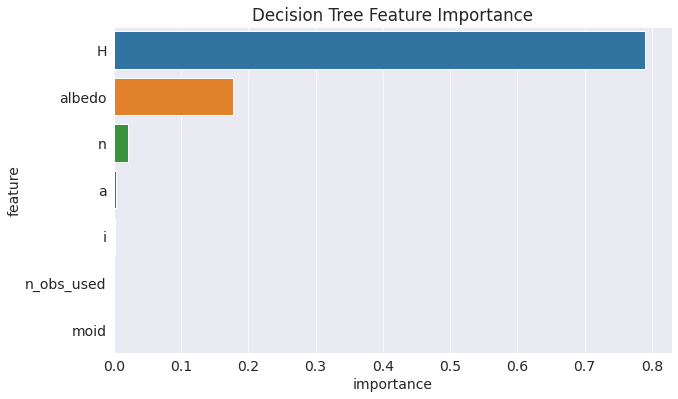

In [ ]:
plt.title('Decision Tree Feature Importance')
sns.barplot(data=model_importance_df.head(7), x='importance', y='feature');

# XGBoostRegressor

In [ ]:
XR = XGBRegressor()
XR.fit(X_train, train_targets)

[17:27:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
train_preds_XR = XR.predict(X_train)
train_rmse_XR = mean_squared_error(train_preds_XR, train_targets, squared=False)
val_preds_XR = XR.predict(X_val)
val_rmse_XR = mean_squared_error(val_preds_XR, val_targets, squared=False)
print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse_XR, val_rmse_XR))

Train RMSE: 0.5802881258737378, Validation RMSE: 0.6337367530853336


In [ ]:
score1_train =XR.score(X_train, train_targets)
score1_train

0.9754185516472865

In [ ]:
score1_val =XR.score(X_val, val_targets)
score1_val

0.9711275850332897

The XGboost Regressor is able to score 97.1% on validation set and give RMSE Error of 0.63. t's a significant improvement from the last XGboost Regressor model where we ran this model on dataset with outliers.

# Hyperparameter Tuning

In [ ]:
def test_params(**params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params).fit(X_train, train_targets)
    return model.score(X_train, train_targets), model.score(X_val, val_targets)

n_estimators

In [ ]:
test_params(n_estimators=250)

[17:28:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.9784054503508635, 0.9738877889355454)

In [ ]:
test_params(n_estimators=500)

[17:28:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.9802401703413158, 0.974815156948074)

In [ ]:
test_params(n_estimators=1000)

[17:29:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.9824597410197021, 0.9753924993809772)

It seems more the n_estimator better it is. Let's also find the optimal value of max depth

In [ ]:
test_params(max_depth=5)

[17:31:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.9805749575938275, 0.9742898694258408)

In [ ]:
test_params(max_depth=7)

[17:31:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.9841054984681568, 0.9766445347389295)

In [ ]:
test_params(max_depth=12)

[17:31:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.9940703869954177, 0.9736906965046501)

Let's also apply booster.

In [ ]:
test_params(booster='gblinear')

[17:32:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.023407412727630694, 0.022373201037701018)

Clearly, gblinear is not for this type of data.

# Training the Best Model

In [ ]:
XR1 = XGBRegressor(n_estimators=1000, max_depth=7)
XR1.fit(X_train, train_targets)

[17:32:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=7, n_estimators=1000)

In [ ]:
train_preds_XR = XR1.predict(X_train)
train_rmse_XR = mean_squared_error(train_preds_XR, train_targets, squared=False)
val_preds_XR = XR1.predict(X_val)
val_rmse_XR = mean_squared_error(val_preds_XR, val_targets, squared=False)
print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse_XR, val_rmse_XR))

Train RMSE: 0.30449670023017544, Validation RMSE: 0.5741373815902591


In [ ]:
score1_train =XR1.score(X_train, train_targets)
score1_train

0.9932316114578069

In [ ]:
score1_val =XR1.score(X_val, val_targets)
score1_val

0.9763028034474983

The XGboost Regressor model is able to score 97.63% on validation set and giving RMSE Error of 0.57. It's a slight improvement after tuning. Let's also check the importance factor now.

In [ ]:
model_importances = XR1.feature_importances_
model_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model_importances
}).sort_values('importance', ascending=False)

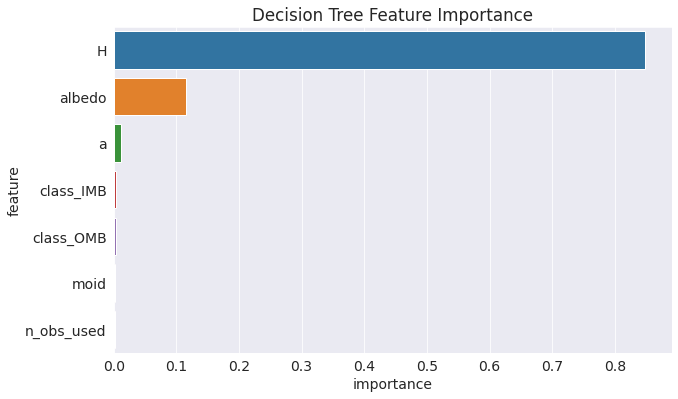

In [ ]:
plt.title('Decision Tree Feature Importance')
sns.barplot(data=model_importance_df.head(7), x='importance', y='feature');

# Comparing Random Forest and XGBoost Regressor performance.

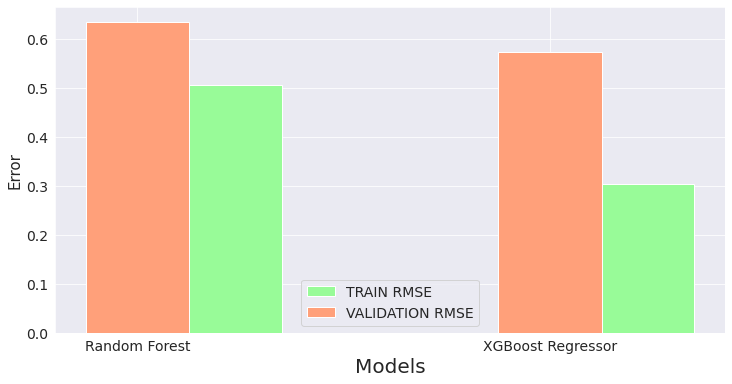

In [ ]:
models=['Random Forest', 'XGBoost Regressor']
R=[train_rmse_lr, train_rmse_XR]
V=[val_rmse_lr, val_rmse_XR]

plt.figure(figsize=(12, 6))

plt.bar(models, R, width=0.35, align='edge', color='palegreen', label = "TRAIN RMSE")
plt.bar(models, V, width=0.25, color='lightsalmon', label = "VALIDATION RMSE")

plt.xlabel("Models", fontsize = 20)
plt.ylabel("Error", fontsize= 15, rotation= 90)
plt.legend()

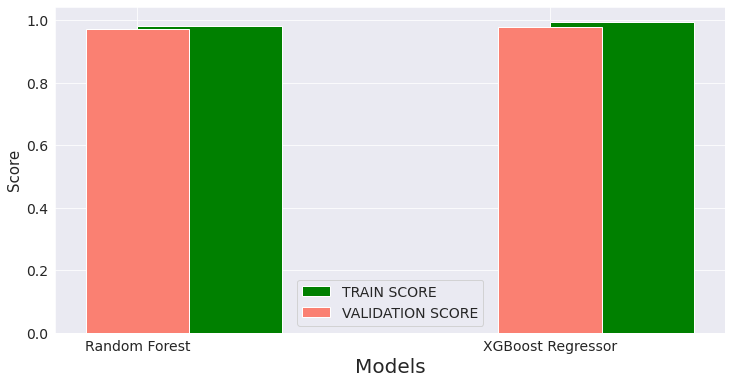

In [ ]:
models=['Random Forest', 'XGBoost Regressor']
R=[score_train, score1_train]
V=[score_val, score1_val]

plt.figure(figsize=(12, 6))

plt.bar(models, R, width=0.35, align='edge', color='green', label = "TRAIN SCORE")
plt.bar(models, V, width=0.25, color='salmon', label = "VALIDATION SCORE")

plt.xlabel("Models", fontsize = 20)
plt.ylabel("Score", fontsize= 15, rotation= 90)
plt.legend()

Clearly, XGboosterRegeression is slightly better than RandomForestRegressor. 

# Making Predictions on the Test Set
Earlier we saved a test set to check the performace of best tuned model. Now I will be applying test dataset on best tuned model

In [ ]:
X_test

,a,e,i,q,ad,per_y,data_arc,n_obs_used,H,albedo,moid,n,per,class_AMO,class_APO,class_AST,class_ATE,class_CEN,class_IMB,class_MBA,class_MCA,class_OMB,class_TJN
635306,0.005249,0.152311,0.064150,0.054058,0.002680,0.000502,0.002559,0.001180,0.558052,0.033033,0.032466,0.113803,0.000502,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48562,0.006299,0.099458,0.004302,0.066597,0.003081,0.000637,0.129728,0.075751,0.438202,0.085085,0.044423,0.091907,0.000637,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
140307,0.005003,0.055266,0.065361,0.058117,0.002218,0.000472,0.088026,0.069313,0.456929,0.183183,0.036529,0.120233,0.000472,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
624655,0.004682,0.064461,0.066338,0.054651,0.002077,0.000434,0.001431,0.001395,0.460674,0.112112,0.032756,0.129551,0.000434,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
98203,0.004727,0.159242,0.058014,0.049372,0.002399,0.000439,0.128861,0.049249,0.471910,0.110110,0.027598,0.128166,0.000439,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331544,0.005285,0.214541,0.037863,0.050289,0.002913,0.000507,0.091108,0.016524,0.509363,0.052052,0.028341,0.112914,0.000507,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
114938,0.006425,0.147474,0.032494,0.064033,0.003341,0.000654,0.098455,0.052468,0.441948,0.066066,0.042035,0.089761,0.000654,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10319,0.004277,0.135264,0.037098,0.047062,0.002067,0.000386,0.142702,0.191631,0.415730,0.507508,0.024686,0.143129,0.000386,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
181773,0.006439,0.114392,0.111421,0.066674,0.003218,0.000656,0.111938,0.060086,0.423221,0.058058,0.045613,0.089518,0.000656,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
XR1.fit(X_test, test_targets)

[17:54:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=7, n_estimators=1000)

In [ ]:
test_preds = XR1.predict(X_test)
test_rmse_XR = mean_squared_error(test_preds, test_targets, squared=False)
print('Test RMSE: {}'.format(test_rmse_XR))

Test RMSE: 0.1900165006218516


In [ ]:
score_test =XR1.score(X_test, test_targets)
score_test

0.9976509758474158

This model working very well on test set with a score of 99.7% and giving RMSE Error of 0.19. Let's also apply test dataset on Random Forest Regressor.

In [ ]:
random_rf1.fit(X_test, test_targets)

RandomForestRegressor(max_depth=12, max_leaf_nodes=32768, min_samples_leaf=6,
                      min_samples_split=7, n_jobs=-1, random_state=42)

In [ ]:
test_preds_rf = random_rf1.predict(X_test)
test_rmse_rf = mean_squared_error(test_preds_rf, test_targets, squared=False)
print('Test RMSE: {}'.format(test_rmse_rf))

Test RMSE: 0.7081085183631374


In [ ]:
score_test_rf =random_rf1.score(X_test, test_targets)
score_test_rf

0.9673784578233176

This model working just below the XGbooster Regeressor on test set with a score of 96.7% and giving RMSE Error of 0.70.

# Saving and Loading Trained Models
Now I will save the best performing model and other required items for future use,

In [ ]:
best_model = XGBRegressor(n_estimators=1000, max_depth=7)

In [ ]:
best_model.fit(X_train, train_targets)

[18:03:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=7, n_estimators=1000)

In [ ]:
train_prediction = best_model.predict(X_train)
val_prediction = best_model.predict(X_val)
test_prediction = best_model.predict(X_test)
train_score = score1_train
val_score = score1_val
test_score = score_test
print('Train set Accuracy: {:.2f}%'.format(train_score*100))
print('Validation set Accuracy: {:.2f}%'.format(val_score* 100))
print('Test set Accuracy: {:.2f}%'.format(test_score* 100))

Train set Accuracy: 99.32%
Validation set Accuracy: 97.63%
Test set Accuracy: 99.77%


We can use the joblib module to save and load Python objects on the disk.



In [ ]:
import joblib

In [ ]:
asteroid_diameter_best_model = {
    'model': best_model,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols,
    'X_train' : X_train,
    'X_val' : X_val,
    'X_test' : X_test, 
    'train_targets': train_targets,
    'val_targets': val_targets,
    'test_targets': test_targets,

    }

In [ ]:
joblib.dump(asteroid_diameter_best_model, 'asteroid_diameter_best_model.joblib')

['asteroid_diameter_best_model.joblib']

## Summary and References

## Summary
In this project the following tasks are performed:

- Downloaded a real-world dataset from a Kaggle and identified a problem to work on with the dataset, stated the modeling objective with clarity.
- Performed exploratory data analysis to gather insights, created a training, validation & test dataset and prepared the data for modeling.
- Trained and evaluated different machine learning models such as Linear Regression, Decision Tree Regression, Random Forest Regression and XGBoost Regressor. Tuned hyperparameters to improve models.
- The final performance of best models are evaluated with a test data.


## References
1. The dataset used for this project is obtaned from Kaggle and at https://www.kaggle.com/datasets/basu369victor/prediction-of-asteroid-diameter/code

2. https://jovian.com/learn/machine-learning-with-python-zero-to-gbms

3. https://jovian.com/nitinjoshi07/python-random-forests-assignment

4. https://www.geeksforgeeks.org/

5. https://albertum.medium.com/l1-l2-regularization-in-xgboost-regression-7b2db08a59e0

6. https://machinelearningmastery.com/evaluate-gradient-boosting-models-xgboost-python/